In [8]:
import wfdb
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

In [9]:
def filter_with_NLMS(in_sig, desired_sig, n = 1, m = 0.01):
    # creation of data
    N = len(in_sig)
    filt_size =  n
    x = pa.input_from_history(in_sig,filt_size)
    d = desired_sig.reshape(len(desired_sig), 1)
    d = d[:N-filt_size+1, 0]

    f = pa.filters.FilterLMS(n=filt_size, mu=m, w="zeros")
    y, e, w = f.run(d, x)
    return y, e, w  

In [10]:
#Números que salían bien
#JS00062 (01/010)
#JS21673 (22/222)

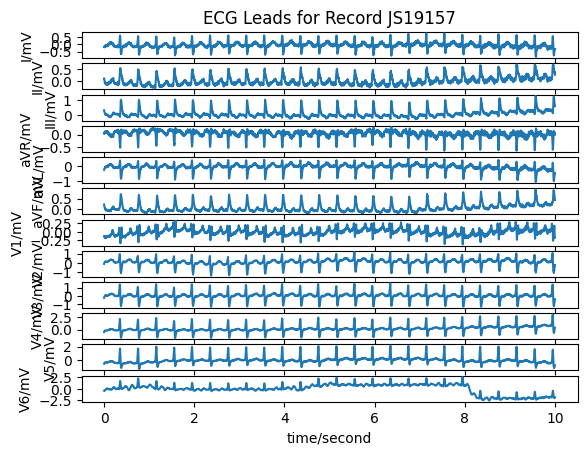

<Figure size 640x480 with 0 Axes>

Record Name: JS19157
Number of Leads: 12
Sampling Frequency: 500 Hz
Record Duration: 10.0 seconds
Lead Names: ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


In [11]:
#https://physionet.org/content/ecg-arrhythmia/1.0.0/#files-panel

record_name2 = 'JS19157'  # Change this to the desired record name
record2 = wfdb.rdrecord(record_name2, pn_dir='ecg-arrhythmia/WFDBRecords/19/197')

# Plot the ECG leads
wfdb.plot_wfdb(record=record2, title=f'ECG Leads for Record {record_name2}')
plt.tight_layout()
plt.show()

# Print additional information about the ECG record
record_info2 = wfdb.rdheader(record_name2, pn_dir='ecg-arrhythmia/WFDBRecords/19/197')

print(f"Record Name: {record_info2.record_name}")
print(f"Number of Leads: {record_info2.n_sig}")
print(f"Sampling Frequency: {record_info2.fs} Hz")
print(f"Record Duration: {record_info2.sig_len / record_info2.fs} seconds")
print(f"Lead Names: {record_info2.sig_name}")

# You can access more information from the record_info object as needed.

In [12]:
import wfdb
record_info = wfdb.rdheader('JS19157', pn_dir='ecg-arrhythmia/WFDBRecords/19/197')



In [13]:
aVR = record2.p_signal[:, 3]
aVL = record2.p_signal[:, 4]
aVF = record2.p_signal[:, 5]

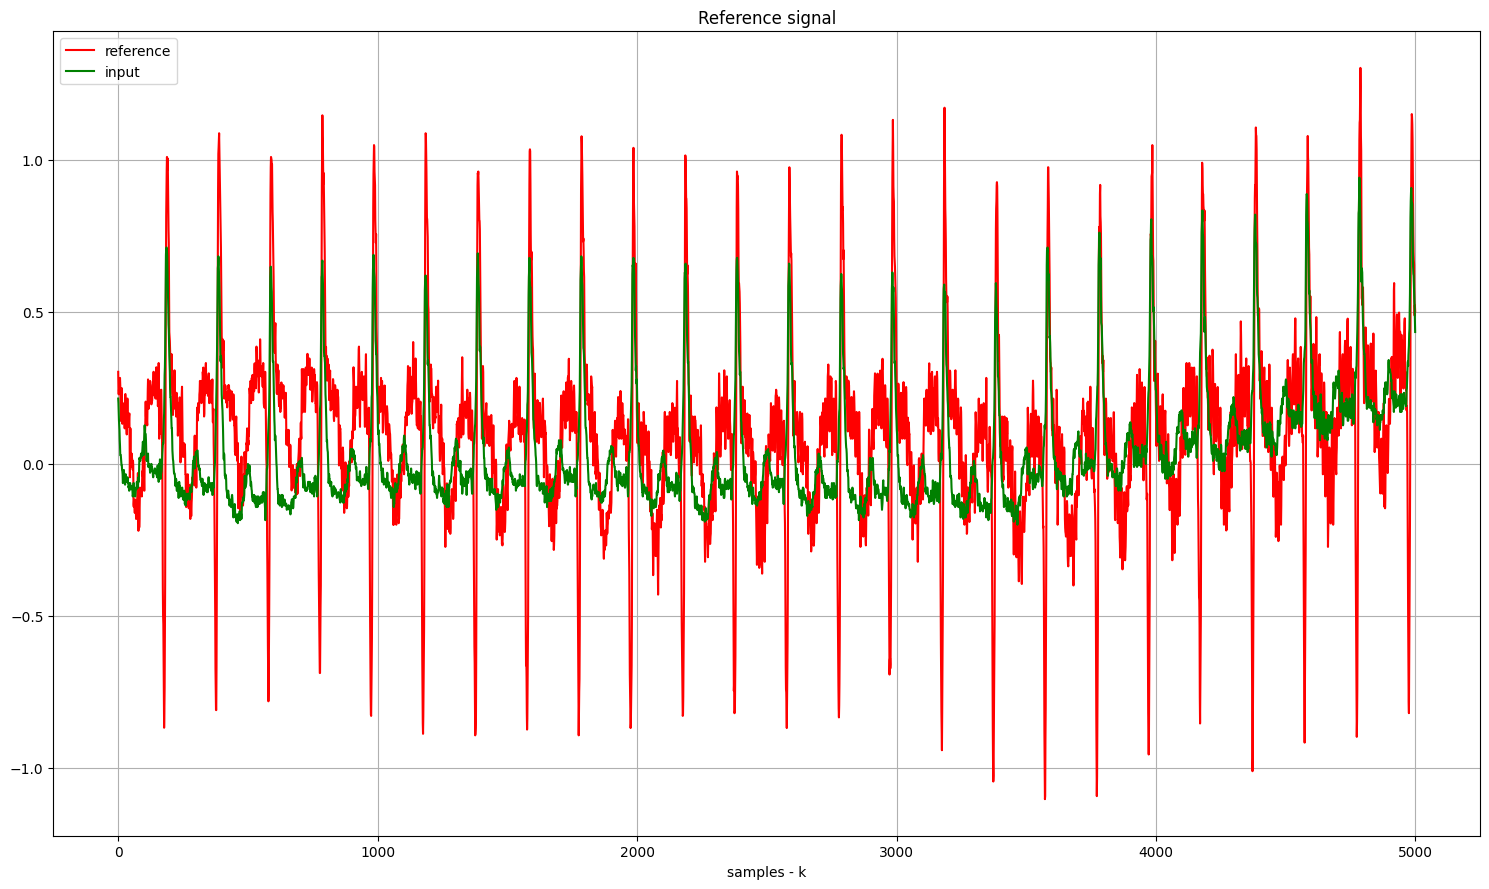

In [14]:
plt.figure(figsize=(15,9))
plt.title("Reference signal");plt.xlabel("samples - k")
plt.plot(aVR - aVL,"r", label="reference");plt.legend()
plt.plot(aVF,"g", label="input");plt.legend();plt.grid()
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

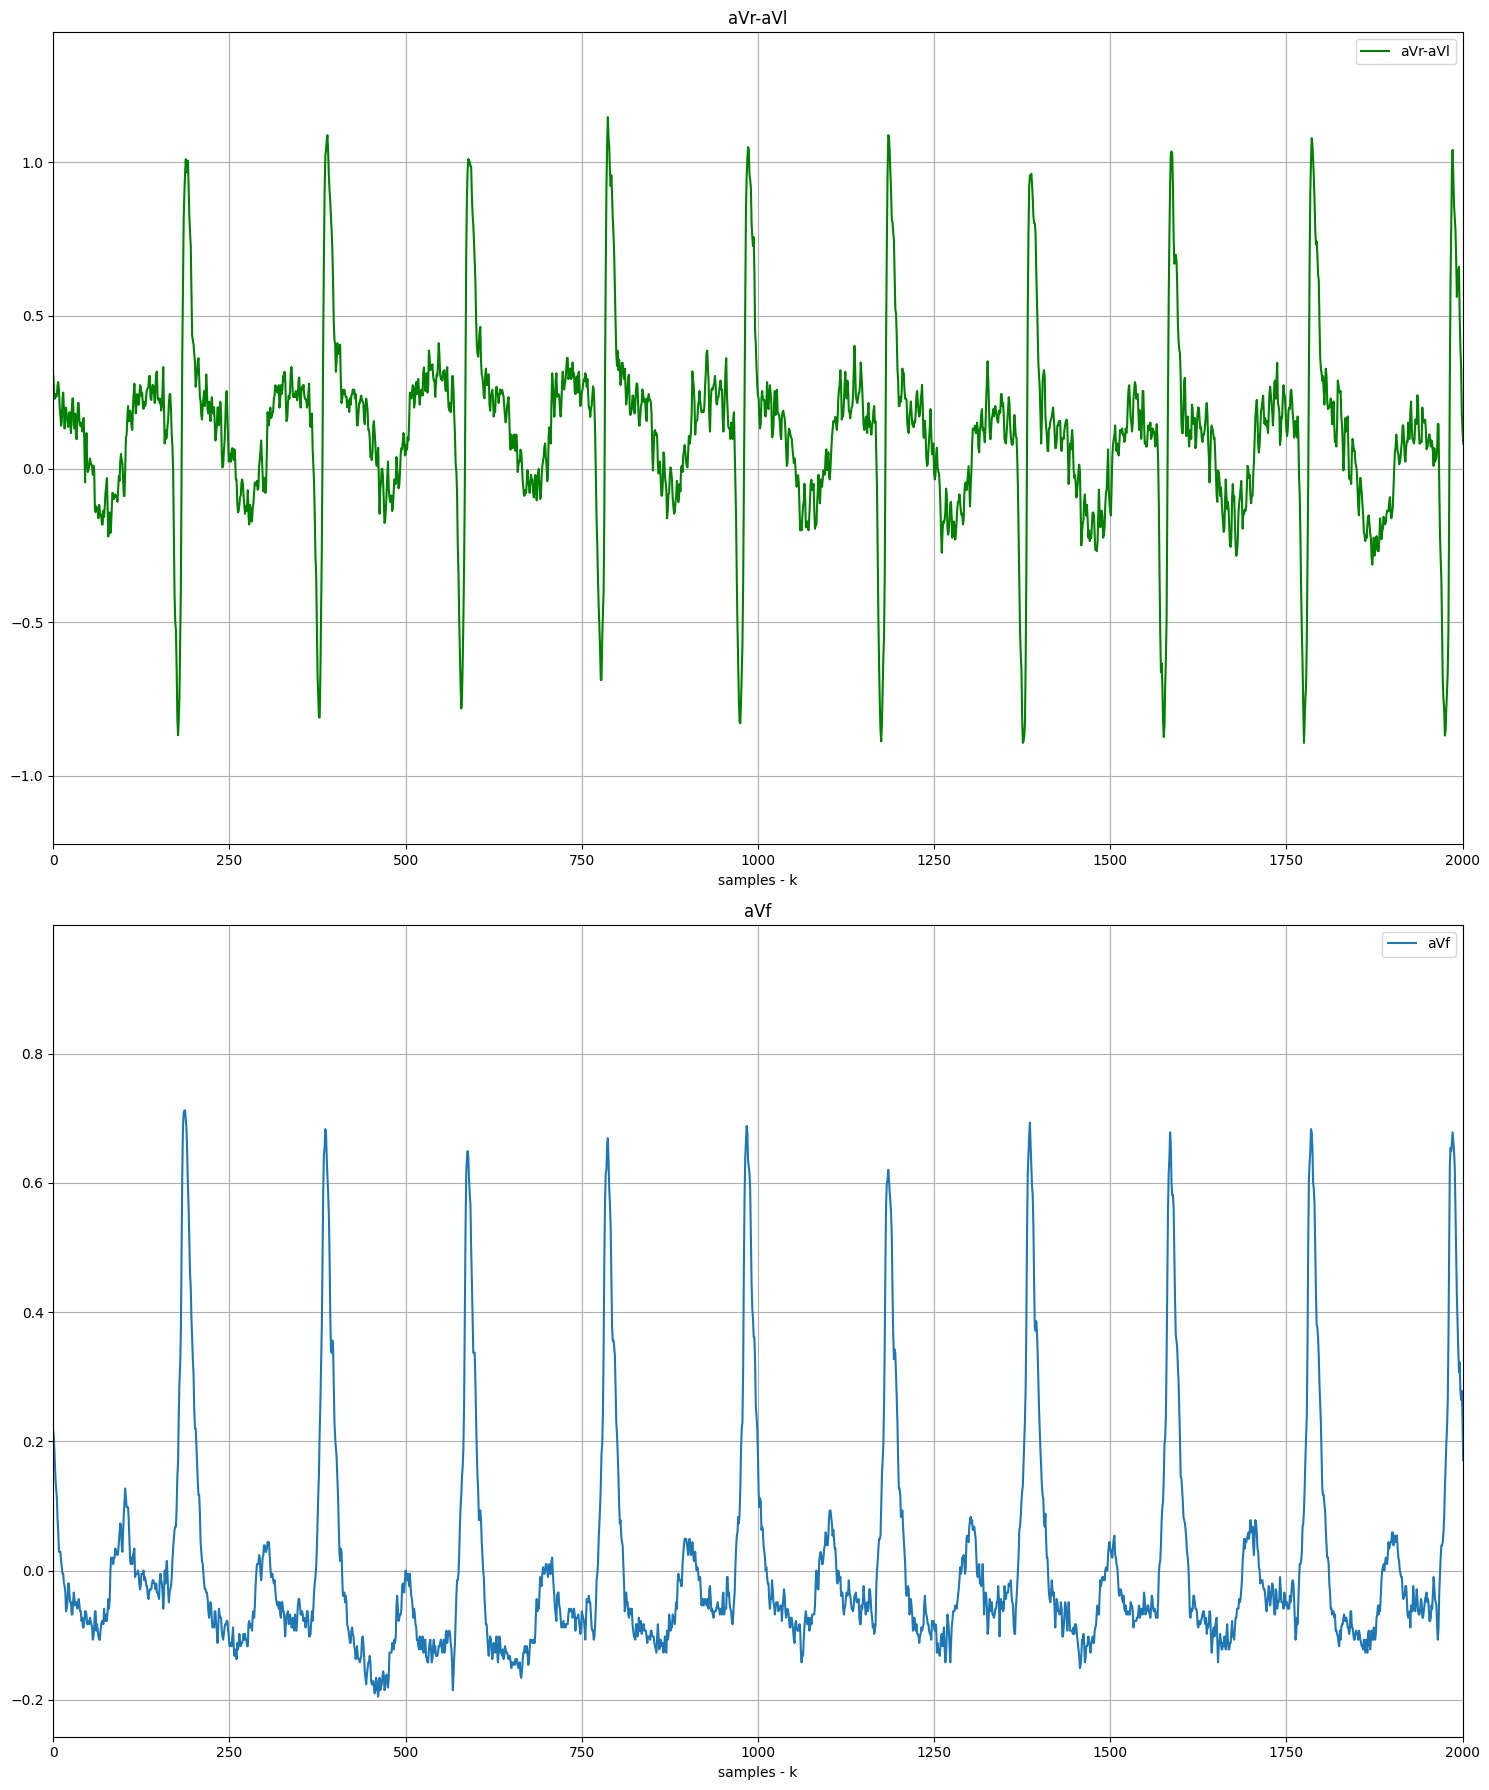

In [17]:
# show results
plt.figure(figsize=(15,18))
plt.subplot(211);plt.title("aVr-aVl");plt.xlabel("samples - k")
plt.plot(aVR - aVL,"g", label="aVr-aVl");plt.legend();plt.grid();  plt.xlim(0,2000)
plt.subplot(212);plt.title("aVf");plt.xlabel("samples - k")
plt.plot(aVF, label='aVf'); plt.legend(); plt.xlim(0,2000)
#plt.plot(e,"r", label="e - error [dB]");plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

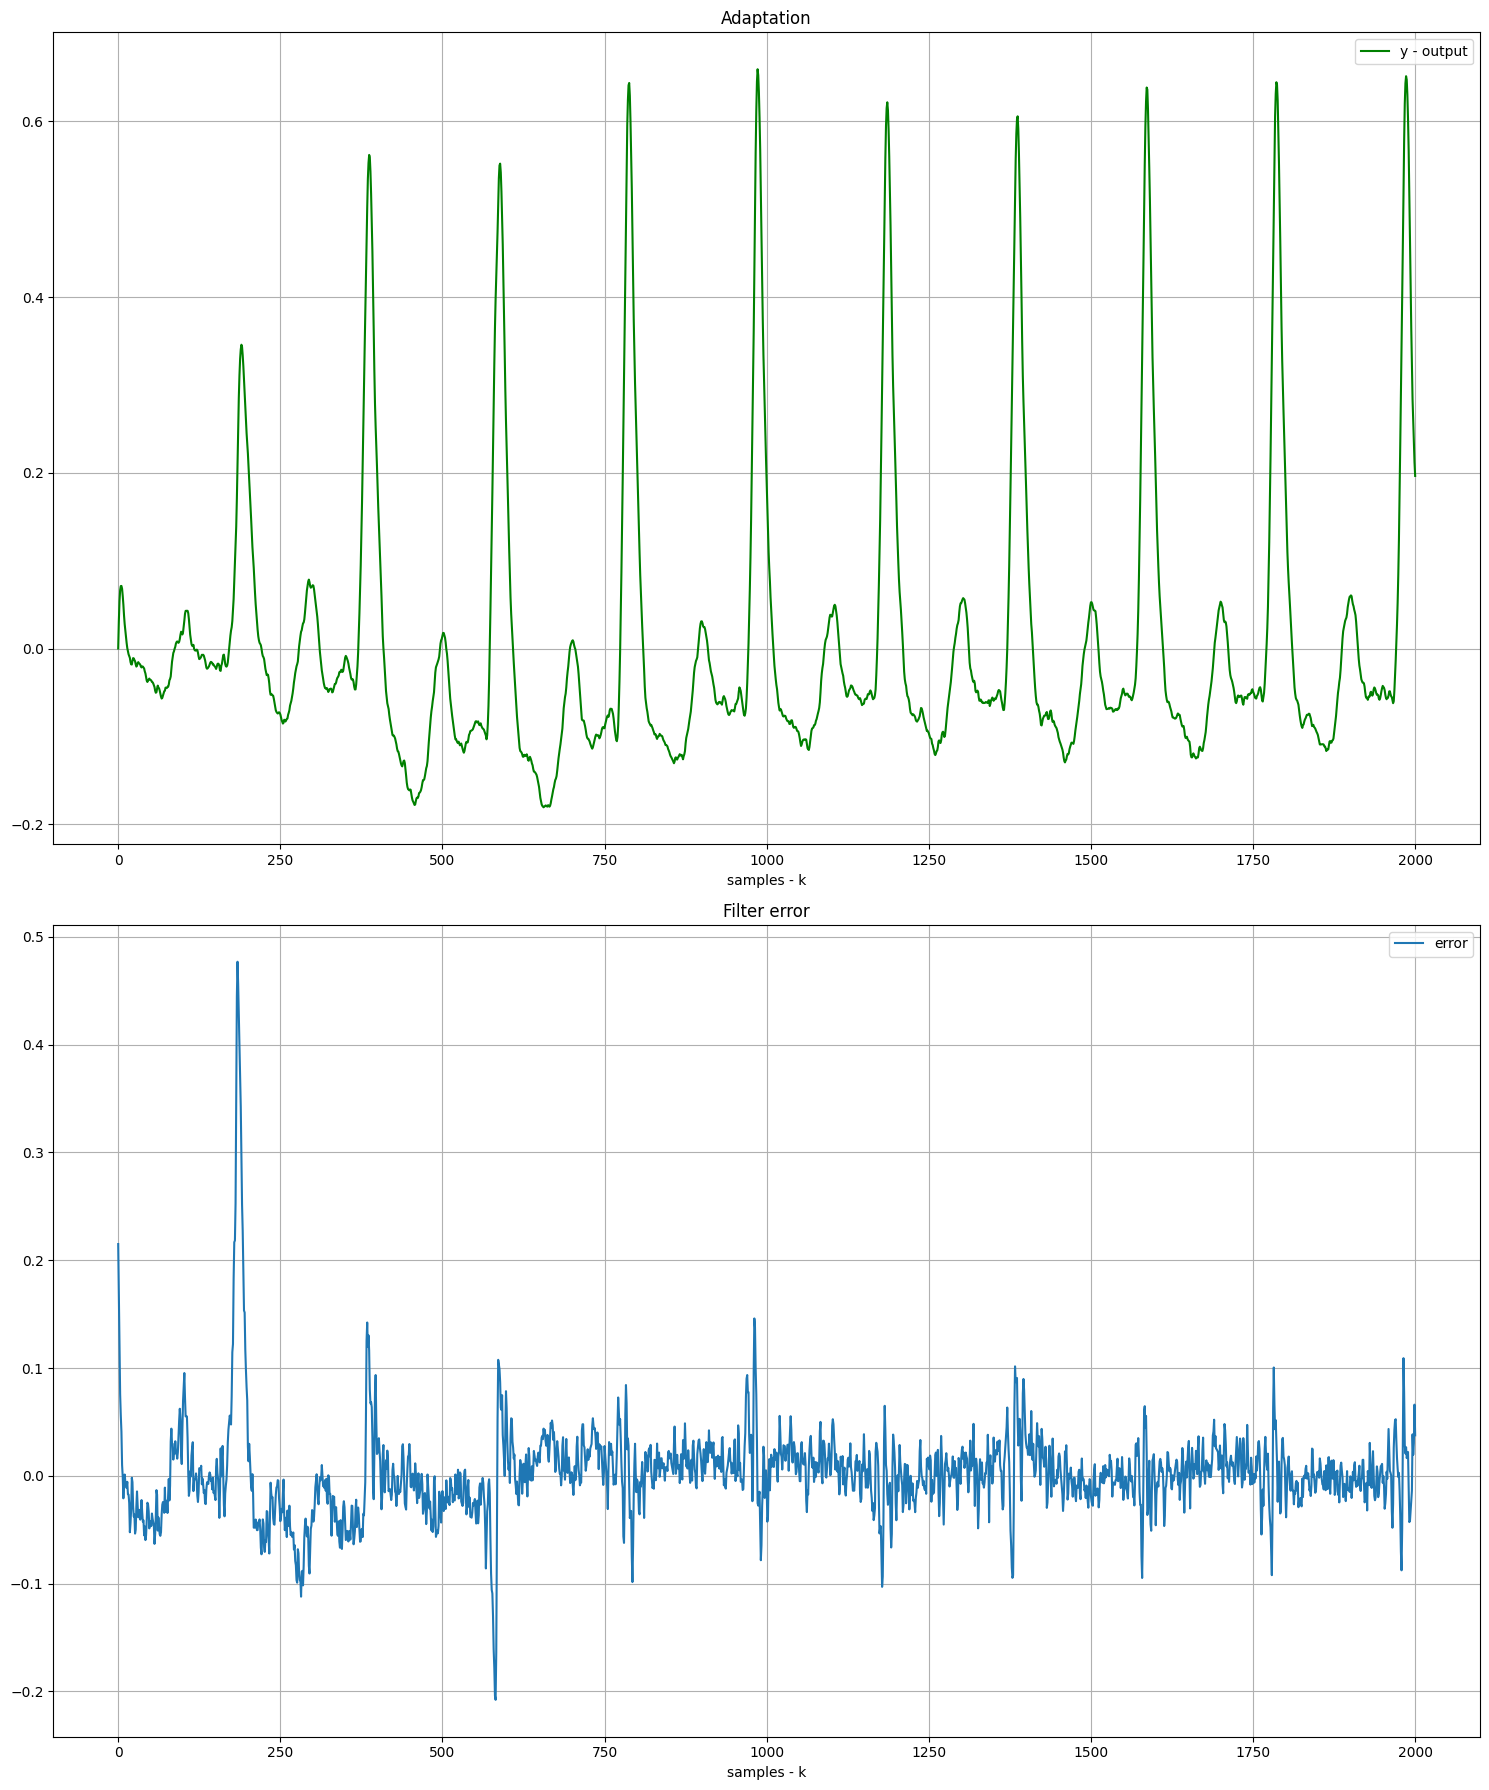

In [18]:
ref_signal = aVR - aVL
x = aVF

y, e, w = filter_with_NLMS(ref_signal, x, 3000, 0.0005)

# show results
plt.figure(figsize=(15,18))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(y,"g", label="y - output");plt.legend();plt.grid()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e, label='error'); plt.legend()
#plt.plot(e,"r", label="e - error [dB]");plt.legend()

plt.tight_layout()
plt.grid()
plt.show()